In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Import lab 2
import sys
sys.path.append('../../ex02/template/')

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
from costs import compute_loss

def least_squares(y, tx):
    """Calculate the least squares solution."""
    w = np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)
    return compute_loss(y, tx, w, error_type='mse'), w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [175]:
from helpers import *
from gradient_descent import gradient_descent

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    # Perform least square
    ls_result = least_squares(y, tx)
    
    # Perform gradient descent
    gd_result = gradient_descent(y, tx, [0, 0], 50, 0.7, error_type='mse')
    
    # Print results
    print('Least square: w = {0} with loss {1}'.format(ls_result[1], ls_result[0]))
    print('Gradient descent: w = {0} with loss {1}'.format(gd_result[1][-1], gd_result[0][-1]))

Test it here

In [176]:
test_your_least_squares()

Gradient Descent(0/49): loss=2792.236712759167, w0=51.305745401473324, w1=9.435798704492441
Gradient Descent(1/49): loss=265.3024621089662, w0=66.69746902191562, w1=12.266538315840048
Gradient Descent(2/49): loss=37.878379550441785, w0=71.31498610804832, w1=13.115760199244336
Gradient Descent(3/49): loss=17.410212120174524, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450459, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.40228489526529, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652206, w0=73.29379216412119, w1=1

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [107]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    if len(x.shape) > 1:
        if x.shape[1] > 1:
            raise ValueError('x must be a vector')
        x = x.ravel()
    
    phi = np.zeros((degree + 1, len(x)))
    for d in range(degree + 1):
        phi[d] = x**d
        
    return phi.T

In [108]:
build_poly(np.array([1, 2, 3]), 2)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.]])

In [52]:
def compute_rmse(mse):
    return np.sqrt(2 * mse)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [53]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        expanded_x = build_poly(x, degree)
        mse, weights = least_squares(y, expanded_x)
        rmse = compute_rmse(mse)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907355
Processing 4th experiment, degree=12, rmse=0.3526250258372488


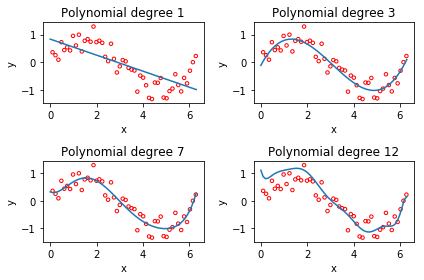

In [54]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [109]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # Set seed
    np.random.seed(seed)
    
    # Shuffle data
    x = x[:, np.newaxis] if len(x.shape) < 2 else x
    data = np.append(x, y[:, np.newaxis], axis=1)
    np.random.shuffle(data)
    x, y = data[:, :-1], data[:, -1:]
    
    # Make sure there is at least one point in each set
    train_idx = int(ratio * len(y))
    if train_idx == 0:
        train_idx += 1
    elif train_idx == len(y) - 1:
        train_idx -= 1
    
    # Split
    train_x, train_y = x[:train_idx], y[:train_idx].ravel()
    test_x, test_y = x[train_idx:], y[train_idx:].ravel()
    
    return (train_x, train_y), (test_x, test_y)

In [110]:
split_data(np.zeros((2, 2)), np.ones(2), 0.2)

((array([[ 0.,  0.]]), array([ 1.])), (array([[ 0.,  0.]]), array([ 1.])))

Then, test your `split_data` function below.

In [116]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # Split data
    (train_x, train_y), (test_x, test_y) = split_data(x, y, ratio)
    
    # Augment data
    train_x_poly = build_poly(train_x, degree)
    test_x_poly = build_poly(test_x, degree)
    
    # Perform Least Square
    mse, w = least_squares(train_y, train_x_poly)
    
    # Compute RMSE
    rmse_tr = compute_rmse(mse)
    rmse_te = compute_rmse(compute_loss(test_y, test_x_poly, w, error_type='mse'))

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

In [115]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.622, Testing RMSE=0.358
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=0.385, Testing RMSE=0.544
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.677, Testing RMSE=1.605
proportion=0.1, degree=12, Training RMSE=1.730, Testing RMSE=267.383


# 3 Ridge Regression
Please fill in the function below.

In [184]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # Make sure tx is a matrix
    tx = tx[:, np.newaxis] if len(tx.shape) == 1 else tx
    
    prime = 2 * len(y) * lambda_
    w = np.linalg.inv(tx.T.dot(tx) + prime * np.identity(tx.shape[1])).dot(tx.T).dot(y)
    return compute_loss(y, tx, w, error_type='mse'), w

In [185]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # Split data
    (train_x, train_y), (test_x, test_y) = split_data(x, y, ratio)
    
    # Augment data
    train_x_poly = build_poly(train_x, degree)
    test_x_poly = build_poly(test_x, degree)

    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        mse, w = ridge_regression(train_y, train_x_poly, lambda_)

        # Compute RMSE
        rmse_tr.append(compute_rmse(mse))
        rmse_te.append(compute_rmse(compute_loss(test_y, test_x_poly, w, error_type='mse')))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.325
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.239, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.259, Testing RMSE=0.266
proportion=0.5, degree=7, lambda=0.193, 

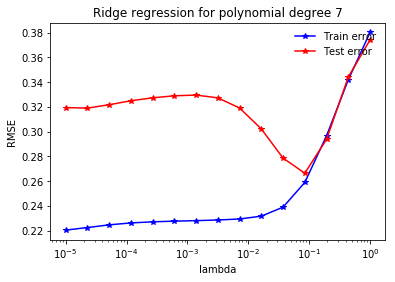

In [189]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)